# Problem Statement

California faced a lot of Covid 19 cases and subsequent deaths. Explore the Data Set and present your findings along with visualization.

# Importing Relevant Data Science Libraries

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.style

# Loading Data Set in a DataFrame

In [242]:
file_path = 'https://raw.githubusercontent.com/HarisJafri-xcode/Python-for-DS/refs/heads/main/05-Datasets/ca-covid.csv'

In [243]:
df = pd.read_csv(file_path)

# Analyzing the Data Frame

In [244]:
df.head()

,date,state,cases,deaths
0,25.01.20,California,1,0
1,26.01.20,California,1,0
2,27.01.20,California,0,0
3,28.01.20,California,0,0
4,29.01.20,California,0,0


In [245]:
df.tail()

,date,state,cases,deaths
337,27.12.20,California,37555,62
338,28.12.20,California,41720,246
339,29.12.20,California,34166,425
340,30.12.20,California,32386,437
341,31.12.20,California,32264,574


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    342 non-null    object
 1   state   342 non-null    object
 2   cases   342 non-null    int64 
 3   deaths  342 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.8+ KB


In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cases,342.0,6747.862573,10023.201267,0.0,1352.25,3462.5,7637.25,64987.0
deaths,342.0,75.921053,76.639861,-5.0,22.00,62.5,104.00,574.0


Before proceeding any further, date should not be an Object but a datetime object and also min deaths in a Day can not be -5.

# Changing the Date Column and Correcting the negative Death

In [248]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%y')

In [249]:
df['date'].dtype # Checking for Confirmation

dtype('<M8[ns]')

In [250]:
mask_for_negative_deaths = df['deaths'] < 0

In [251]:
df[mask_for_negative_deaths]

,date,state,cases,deaths
239,2020-09-20,California,3001,-5


In [252]:
df.iloc[239,3] = 0 # Assume there was no death that particular day

Let us check both .info() and .describe() to check for rectification of both issues.

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    342 non-null    datetime64[ns]
 1   state   342 non-null    object        
 2   cases   342 non-null    int64         
 3   deaths  342 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 10.8+ KB


In [254]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,342,2020-07-13 12:00:00,2020-01-25 00:00:00,2020-04-19 06:00:00,2020-07-13 12:00:00,2020-10-06 18:00:00,2020-12-31 00:00:00,NaN
cases,342.0,6747.862573,0.0,1352.25,3462.5,7637.25,64987.0,10023.201267
deaths,342.0,75.935673,0.0,22.0,62.5,104.0,574.0,76.624854


# Removing Irrelevant Features

The State Column feels quite useless as it is all California.

In [255]:
del df['state']

# Addition of "Month" Column

In [256]:
df['month'] = df['date'].dt.month

In [257]:
df.head()

,date,cases,deaths,month
0,2020-01-25,1,0,1
1,2020-01-26,1,0,1
2,2020-01-27,0,0,1
3,2020-01-28,0,0,1
4,2020-01-29,0,0,1


# Inclusion of Death to Cases Column

In [258]:
df["death_to_case %"] = round((df["deaths"] / df["cases"]) * 100 , 2)

In [259]:
df.head()

,date,cases,deaths,month,death_to_case %
0,2020-01-25,1,0,1,0.0
1,2020-01-26,1,0,1,0.0
2,2020-01-27,0,0,1,NaN
3,2020-01-28,0,0,1,NaN
4,2020-01-29,0,0,1,NaN


In [261]:
df['death_to_case %'] = df['death_to_case %'].fillna(0)

In [262]:
df.head()

,date,cases,deaths,month,death_to_case %
0,2020-01-25,1,0,1,0.0
1,2020-01-26,1,0,1,0.0
2,2020-01-27,0,0,1,0.0
3,2020-01-28,0,0,1,0.0
4,2020-01-29,0,0,1,0.0


In [263]:
df.tail()

,date,cases,deaths,month,death_to_case %
337,2020-12-27,37555,62,12,0.17
338,2020-12-28,41720,246,12,0.59
339,2020-12-29,34166,425,12,1.24
340,2020-12-30,32386,437,12,1.35
341,2020-12-31,32264,574,12,1.78


# Statistical Analysis



In [266]:
df.groupby('month')[['cases','deaths']].sum()

,cases,deaths
month,,
1,3,0
2,25,0
3,8555,184
4,41887,1873
5,62644,2185
6,119039,1841
7,270120,3139
8,210268,3798
9,108584,2883


Let us store this DataFrame inside a Variable.

In [267]:
df_month = df.groupby('month')[['cases','deaths']].sum()

In [269]:
df_month['death to cases %'] = round((df_month['deaths'] / df_month['cases']) * 100 , 2)

In [271]:
df_month

,cases,deaths,death to cases %
month,,,
1,3,0,0.00
2,25,0,0.00
3,8555,184,2.15
4,41887,1873,4.47
5,62644,2185,3.49
6,119039,1841,1.55
7,270120,3139,1.16
8,210268,3798,1.81
9,108584,2883,2.66


# Visualizations

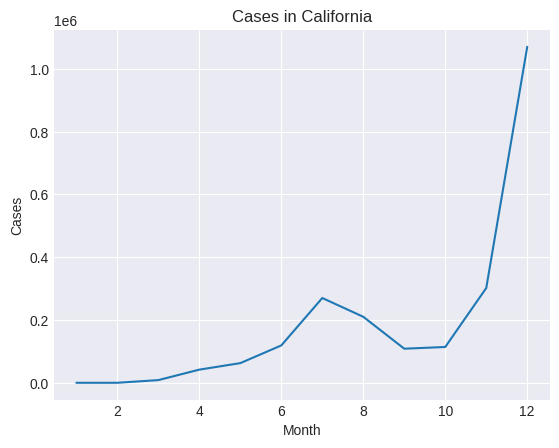

In [282]:
df_month['cases'].plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.title('Cases in California')
plt.show()

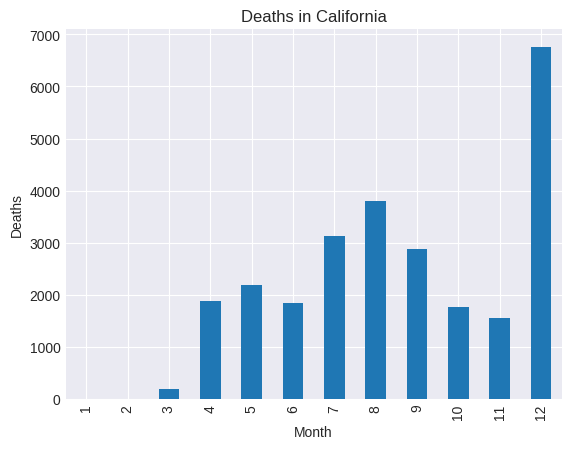

In [283]:
df_month['deaths'].plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title('Deaths in California')
plt.show()

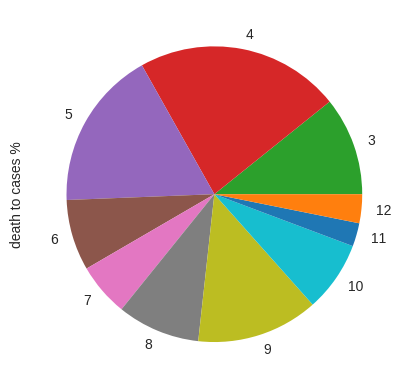

In [285]:
df_month['death to cases %'].plot(kind='pie')
plt.show()

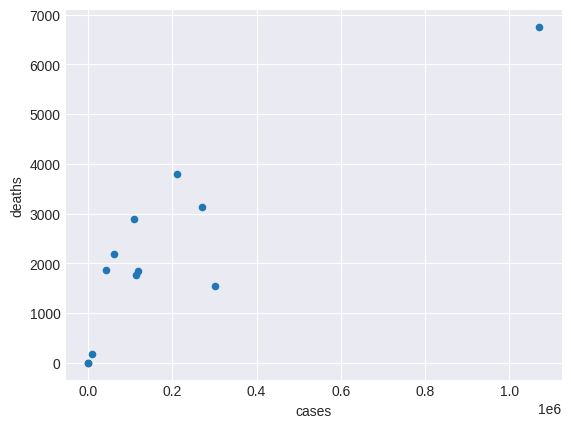

In [290]:
df_month[['cases','deaths']].plot(kind='scatter',x='cases',y='deaths') # Correlation
plt.show()

Let us observe the Month of December more Closely.

<Axes: >

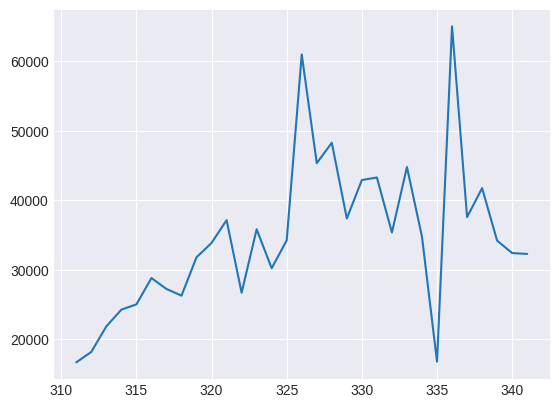

In [294]:
df[df['month'] == 12]['cases'].plot(kind='line')